# Segment image series tutorial 

Written by Jorge Gutierrez, October 2021

Updated by Keely Brown, July 2025

The goal of the *segment image series* function is to separate moderately overlapping plants in a set of multi-plant images taken over time (image time series). 

Users familiar with mutli-plant analysis workflows in PlantCV can use this function to extend the number of images where the data can be analyzed (the plants can be segmented apart).

Analyzing an image time series where plants overlap can be split into three main steps:

1. For each image generate a binary mask separating the plants from the background and save them in a directory.

2. Apply the steps in this tutorial to run `segment_image_series`. The output assigns individual labels for each plant.

3. Run a workflow that loads the labels and uses them to analyze each individual plant.

This tutorial assumes the binary masks were previously generated.

In [ ]:
# Install PlantCV and required dependencies
%pip install "altair>=5" ipympl plantcv

# Give access and mount your Google Drive (need a Google Account)
# Change path to directory you wish output files to be saved to.
from google.colab import drive
drive.mount('/content/gdrive')

# Enable widget feature with matplotlib
from google.colab import output
output.enable_custom_widget_manager()

#View working directory, may need to change path
%pwd
# Change your working directory to the mounted drive 
%cd gdrive/MyDrive/ 
# Print the contents of your drive to confirm it worked 
!ls 
# Clone the workshop's repository to your Google Drive 
!git clone https://github.com/danforthcenter/plantcv-tutorial-segment-image-series.git
# Change your working directory to the cloned repository 
%cd plantcv-tutorial-segment-image-series/

In [ ]:
# Set the notebook display method
# If widget is not working, then change to inline
%matplotlib widget

In [2]:
# Import libraries
import os
import numpy as np

from plantcv import plantcv as pcv 
from plantcv.parallel import WorkflowInputs


In [3]:
# Set workflow arguments for outputs 
# Set debug to plot so you can see where to place ROIs in a sample image

# IMPORTANT: Create a directory to save the output labels and set the path in args.outdir

args = WorkflowInputs(
    images=[""],
    names="image1",
    result="segmentation.json",
    outdir="./",
    writeimg=False,
    debug="plot")

In [4]:
# Set debug to the global parameter
pcv.params.debug = args.debug

# set the output directory to the global parameter
pcv.params.debug_outdir = args.outdir

# Increase text size and thickness to make labels clearer
# (size may need to be altered based on original image size)
pcv.params.text_size = 2
pcv.params.text_thickness = 2

## Create lists of paths to images and masks

In [5]:
# Paths to the directories containing the rgb images and the binary masks
images_directory = './img/'
masks_directory =  './mask/'

# Create the lists of paths to the images and masks
images_paths_sort = [os.path.join(images_directory, i) for i in sorted(os.listdir(images_directory))]
masks_paths_sort = [os.path.join(masks_directory, i) for i in sorted(os.listdir(masks_directory))]


## Create regions of interest (ROI) in one of the images
The ROIs serve as markers for each individual plant. The pixels inside each ROI are labeled based only in the ROI in all time points. For this reason it is encouraged to use small ROIs. 

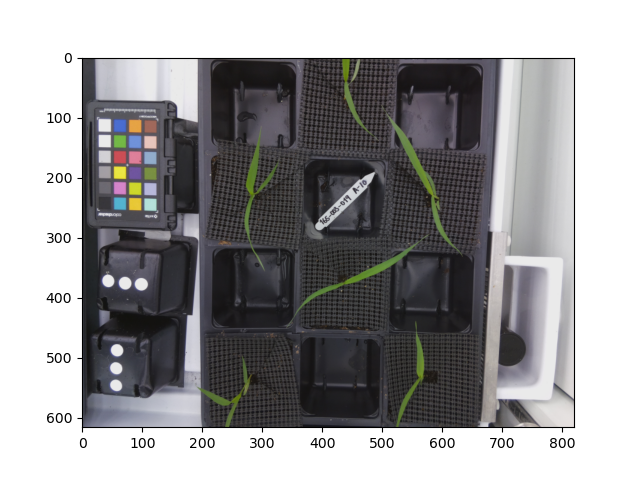

In [6]:
# Read the first image in the dataset to be used as reference for the ROIs
i = 0
img0_path = images_paths_sort[i]
img0, _, _ = pcv.readimage(filename=img0_path)

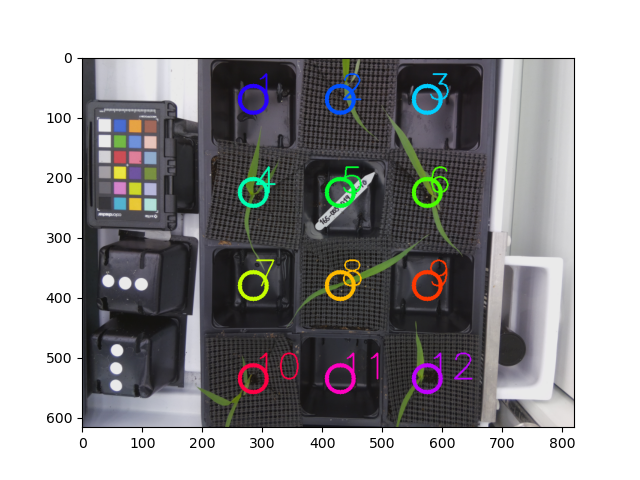

In [7]:
# Create ROIs
rois = pcv.roi.multi(img=img0, coord=(285,70), radius=23, spacing=(145, 155), nrows=4, ncols=3)

In [8]:
# Discard the ROIs where there is no plant
# PlantCV ROI objects contain both contours and heirarchies, so we will keep only the contours for the next step
valid_rois = [rois.contours[i] for i in range(1,len(rois.contours),2)]

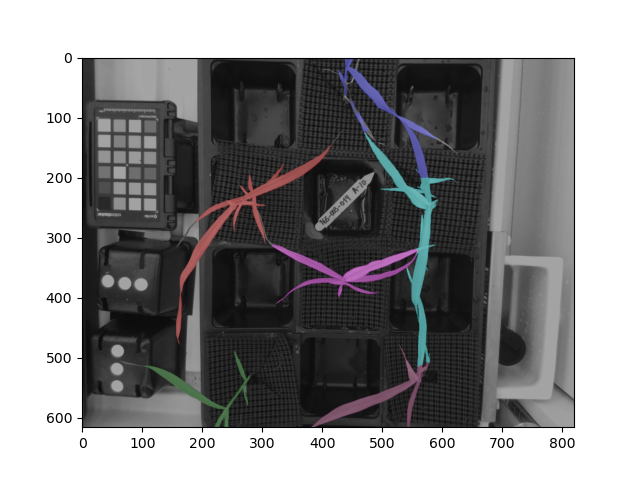

In [9]:
# Run segment image series 
# Change save_labels to True if you want to ...
out = pcv.segment_image_series(images_paths_sort, masks_paths_sort, rois=valid_rois , save_labels=False, ksize=3)

In [10]:
# Output is a 3D array containing the labels of the whole time series
print(out.shape)

(616, 820, 54)
